- npz파일 로딩

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = np.load('data/cats_and_dogs.npz')

In [4]:
len(data)

4

In [5]:
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2000, 224, 224, 3)
(1000, 224, 224, 3)
(2000,)
(1000,)


- 검증용 데이터셋 분리시켜주기

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  random_state=5
                                                 )

In [9]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(1500, 224, 224, 3)
(500, 224, 224, 3)
(1500,)
(500,)


### CNN 모델링

In [12]:
from tensorflow.keras import Sequential
# Conv2D : 2차원 데이터(ex 이미지), Conv3D : 3차원 데이터(ex 영상)
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [13]:
# 신경망 구조 설계
cat_dog_model = Sequential()

# 1. 특성 추출부(Conv - 특징이 되는 정보를 추출)
cat_dog_model.add(Conv2D(input_shape = (224,224,3),
                         # 필터(돋보기)의 개수 → 추출하는 특징의 개수를 설정
                         filters = 64,
                         # 필터 크기 설정
                         kernel_size = (5,5),
                         # same : 원본 데이터의 크기에 맞게 알아서 패딩을 적용
                         # valid : 패딩 적용 X
                         padding = 'same',
                         # 필터로 합성곱 연산을 진행시 건너뛰는 크기를 지정(행,열)
                         strides = (3,3),
                         activation = 'relu'
                        ))
# 과대적합 방지를 위해 20%의 뉴런들을 학습시키지 않음
cat_dog_model.add(Dropout(0.2))

# 2. 특성 추출부(Pooling - 불필요한 정보를 삭제)
# pool_size : 디폴트 값은2 → 2 x 2 풀링 필터
cat_dog_model.add(MaxPooling2D(pool_size=2,
                               strides = (2,2)
                              ))

# 3. MLP층에 넣어주기!
cat_dog_model.add(Flatten())   # 추출된 특징들을 자동적으로 펴줌
cat_dog_model.add(Dense(256, activation='relu'))
cat_dog_model.add(Dense(128, activation='relu'))
cat_dog_model.add(Dense(32, activation='relu'))

cat_dog_model.add(Dense(1, activation='sigmoid'))

cat_dog_model.summary()

# Conv 첫 층의 파라미터 개수는 입력필터수 * 필터크기 * 채널수 + 필터수(b값)    64 * 25 * 3 + 64

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 75, 75, 64)        4864      
_________________________________________________________________
dropout_1 (Dropout)          (None, 75, 75, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               22429952  
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 32)               

In [14]:
# 학습 및 평가 방법 설정
cat_dog_model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['acc']
             )

In [19]:
h = cat_dog_model.fit(X_train, y_train,
              validation_data = (X_val, y_val),
              batch_size=256, 
              epochs = 50
             )

Epoch 1/50
6/6 [==============================] - 25s 4s/step - loss: 0.6900 - acc: 0.5240 - val_loss: 0.7155 - val_acc: 0.4880
Epoch 2/50
6/6 [==============================] - 19s 3s/step - loss: 0.6724 - acc: 0.5607 - val_loss: 0.7233 - val_acc: 0.4980
Epoch 3/50
6/6 [==============================] - 20s 3s/step - loss: 0.6239 - acc: 0.6420 - val_loss: 0.7089 - val_acc: 0.5360
Epoch 4/50
6/6 [==============================] - 22s 4s/step - loss: 0.5321 - acc: 0.7867 - val_loss: 0.8187 - val_acc: 0.5360
Epoch 5/50
6/6 [==============================] - 22s 4s/step - loss: 0.3651 - acc: 0.8553 - val_loss: 0.9053 - val_acc: 0.5520
Epoch 6/50
6/6 [==============================] - 23s 4s/step - loss: 0.1926 - acc: 0.9387 - val_loss: 1.1938 - val_acc: 0.5660
Epoch 7/50
6/6 [==============================] - 22s 4s/step - loss: 0.0838 - acc: 0.9793 - val_loss: 1.7054 - val_acc: 0.5260
Epoch 8/50
6/6 [==============================] - 21s 4s/step - loss: 0.0480 - acc: 0.9920 - val_loss: 1

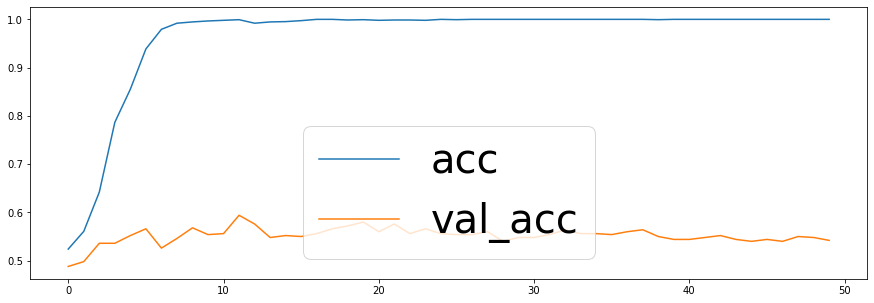

In [20]:
plt.figure(figsize=(15,5))

plt.plot(h.history['acc'],
         label='acc'
        )

plt.plot(h.history['val_acc'],
         label='val_acc'
        )

plt.legend(prop={'size':40}, loc="lower center")
plt.show()

In [22]:
cat_dog_model.evaluate(X_test, y_test)

32/32 [==============================] - 2s 54ms/step - loss: 3.0682 - acc: 0.5780


[3.0681655406951904, 0.578000009059906]